# (15) SVHN — mlp

**Motivation**: host = ```mach```, device = ```cuda:0``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from base.utils_model import load_quick
from figures.analysis import plot_convergence
from figures.imgs import plot_weights

device_idx = 0
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:0  ———  host: mach

## Poisson 

Dataset: SVHN

### Get configs

In [3]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('SVHN', model_type, 'jacob|lin')

seq_len = 32
cfg_vae['track_stats'] = True
cfg_vae['seq_len'] = seq_len
cfg_vae['n_latents'] = 1024

cfg_tr['kl_beta'] = 6/8 * seq_len

### Make model + trainer

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

tr.n_iters

128100

### Print info

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|    IPVAE    |  1.1 Mil   |
|     ———     |    ———     |
|    layer    |  1.1 Mil   |
+-------------+------------+

poisson_SVHN_t-32_z-[1024]_<jacob|lin>
b200-ep350-lr(0.002)_beta(24:0x0.1)_temp(0.05:lin-0.5)_gr(300)_(2024_09_17,19:00)

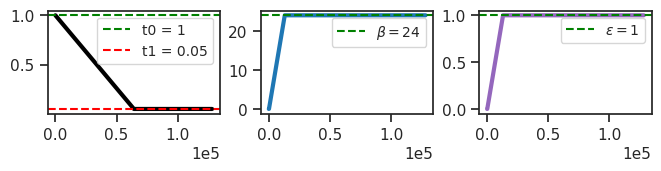

In [5]:
vae.print()
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")
tr.show_schedules()

In [6]:
print_num_params(tr.model.layer)

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  1.1 Mil   |
|     ———      |    ———     |
|    fc_dec    |  1.1 Mil   |
+--------------+------------+

In [7]:
vae.layer.n_exp

tensor([271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271,
        271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271,
        271, 271, 271, 271], device='cuda:0', dtype=torch.int32)

In [8]:
vae.cfg.track_stats

True

In [9]:
print(f"{vars(tr.model.cfg)}\n\n\n{vars(tr.cfg)}")

{'prior_log_dist': 'uniform', 'clamp_prior': -4, 'hard_fwd': False, 'exc_only': False, 'type': 'poisson', 'n_ch': 
32, 'seq_len': 32, 'n_latents': [1024], 'jac_type': 'grad', 'enc_type': 'jacob', 'dec_type': 'lin', 'dataset': 
'SVHN', 'input_sz': (1, 32, 32), 'res_eps': 1.0, 'clamp_u': 8.0, 'clamp_du': 7.0, 'init_dist': 'normal', 
'init_scale': 0.001, 'activation_fn': 'swish', 'fit_prior': True, 'use_bn': False, 'use_se': True, 'track_stats': 
True, 'seed': 0, 'base_dir': '/home/hadi/Projects/PoissonVAE', 'data_dir': '/home/hadi/Datasets', 'runs_dir': 
'/home/hadi/Projects/PoissonVAE/runs/poisson_SVHN_t-32_z-[1024]_<jacob|lin>', 'mods_dir': 
'/home/hadi/Projects/PoissonVAE/models/poisson_SVHN_t-32_z-[1024]_<jacob|lin>', 'results_dir': 
'/home/hadi/Projects/PoissonVAE/results'}


{'lr': 0.002, 'epochs': 350, 'batch_size': 200, 'file_name': None, 'warm_restart': 1, 'warmup_epochs': 5, 
'optimizer': 'adamax_fast', 'optimizer_kws': {'weight_decay': 0.0003, 'betas': (0.9, 0.999), 'eps': 1e-08}, 
'scheduler_type': 'cosine', 'scheduler_kws': {'T_max': 115.0, 'eta_min': 1e-05}, 'ema_rate': None, 'grad_clip': 
300, 'chkpt_freq': 50, 'eval_freq': 20, 'log_freq': 10, 'method': 'mc', 'kl_beta': 24.0, 'kl_beta_min': 0.0001, 
'kl_balancer': None, 'kl_time_adjuster': None, 'kl_anneal_cycles': 0, 'kl_anneal_portion': 0.1, 'kl_const_portion':
0.001, 'temp_anneal_portion': 0.5, 'temp_anneal_type': 'lin', 'temp_start': 1.0, 'temp_stop': 0.05}

### Fit model

In [10]:
tr.train()

epoch # 350, avg loss: 11.701494: 100%|█████| 350/350 [8:47:49<00:00, 90.48s/it]


**Task:** SVHN, ```lin```, 1024-dim latent space, 'clamp_u': 8.0, 'clamp_du': 7.0

In [11]:
print(vae.layer.n_exp)

tensor([ 19,  20,  31,  52,  81, 112, 133, 143, 148, 150, 150, 149, 149, 148,
        147, 147, 147, 146, 145, 145, 145, 145, 144, 143, 142, 142, 141, 141,
        140, 140, 140, 139], device='cuda:0', dtype=torch.int32)

In [19]:
u_max = np.array(tr.model.stats['u_max'])
du_max = np.array(tr.model.stats['du_max'])

u_max.max(), du_max.max()

(5.939628601074219, 3.342998743057251)

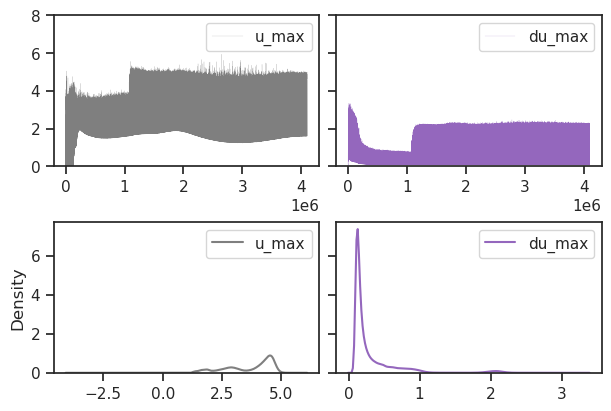

In [20]:
fig, axes = create_figure(2, 2, sharey='row')

axes[0, 0].plot(u_max, color='C7', lw=0.1, label='u_max')
axes[0, 1].plot(du_max, color='C4', lw=0.1, label='du_max')
axes[0, 1].set(ylim=(0, 8))

sns.kdeplot(u_max, color='C7', label='u_max', ax=axes[1, 0])
sns.kdeplot(du_max, color='C4', label='du_max', ax=axes[1, 1])

add_legend(axes)
plt.show()

In [21]:
grad = np.array(list(tr.stats['grad'].values()))
(grad > tr.cfg.grad_clip).sum(), np.round((grad > tr.cfg.grad_clip).mean(), 3)

(89, 0.001)

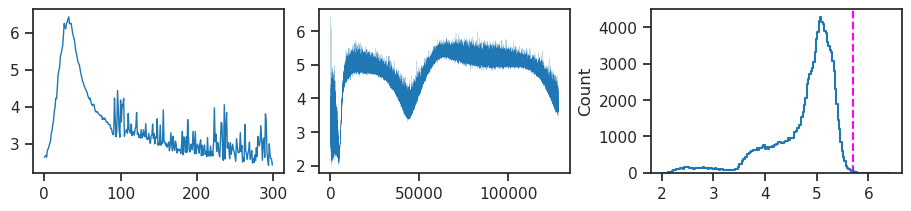

In [22]:
fig, axes = create_figure(1, 3)

axes[0].plot(np.log(grad)[:300], lw=1)
axes[1].plot(np.log(grad), lw=0.1)

axes[2].axvline(np.log(tr.cfg.grad_clip), color='magenta', ls='--')
histplot(np.log(grad), ax=axes[2])

plt.show()

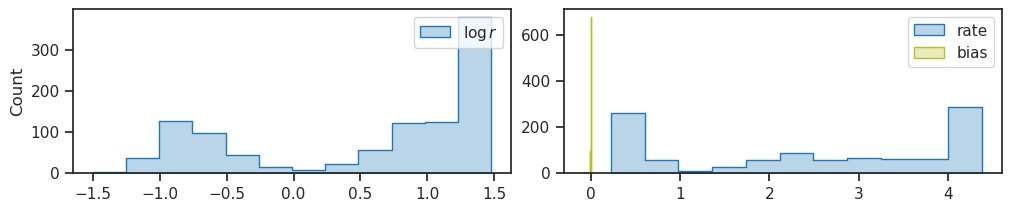

In [26]:
log_rate = tonp(tr.model.layer.log_rate).ravel()
bias = tonp(tr.model.layer.bias).ravel()

fig, axes = create_figure(1, 2, (10, 2))
kws = dict(fill=True, lw=1, alpha=0.3, ax=axes[0])
sns.histplot(log_rate, color='C0', element='step', label=r'$\log r$', **kws)

kws = dict(fill=True, lw=1, alpha=0.3, ax=axes[1])
sns.histplot(np.exp(log_rate), color='C0', element='step', label='rate', **kws)
sns.histplot(bias, color='C8', element='step', label='bias', **kws)

axes[1].set(ylabel='')
add_legend(axes)

plt.show()

In [24]:
dead = log_rate > 0
dead.sum(), (~dead).sum(), dead.sum() / len(dead)

(0, 512, 0.0)

In [3]:
tr, meta = load_model(
    'poisson_SVHN_t-32_z-[1024]_<jacob|lin>',
    'b200-ep350-lr(0.002)_beta(24:0x0.1)_temp(0.05:lin-0.5)_gr(300)_(2024_09_17,19:00)',
    device=device,
)

100%|███████████████████████████████| 131/131 [07:04<00:00,  3.24s/it]


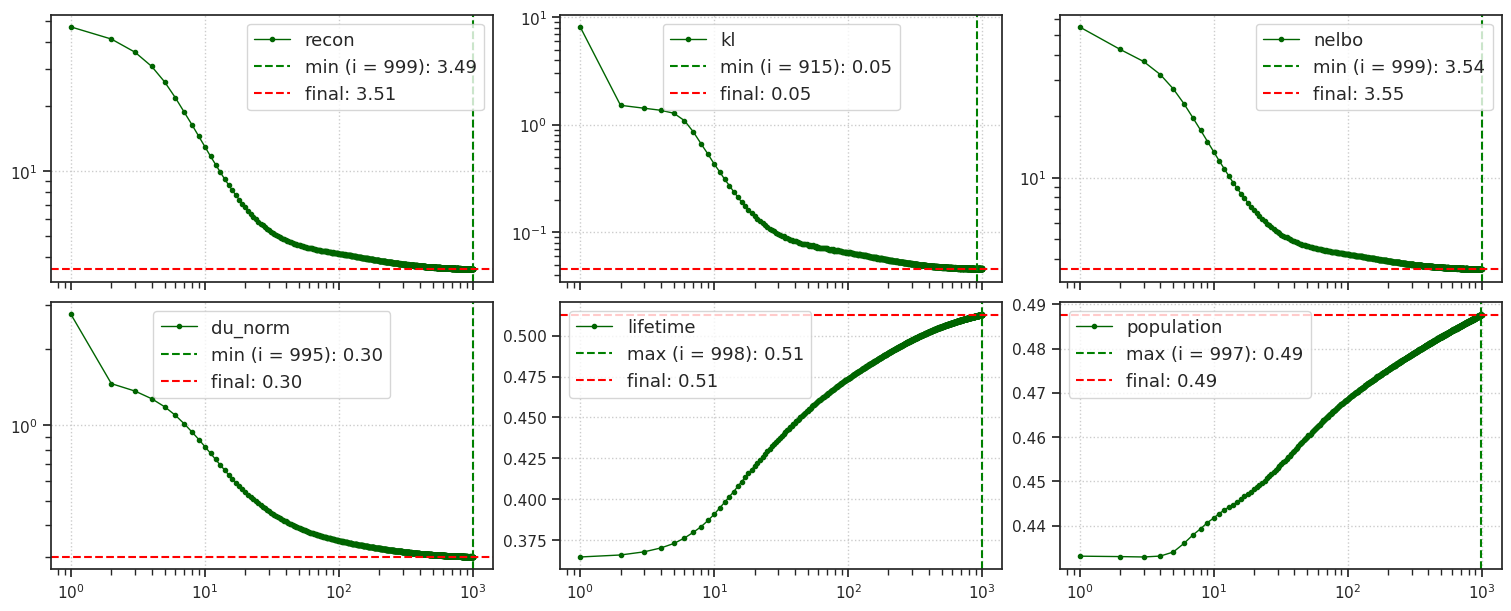

CPU times: user 6min 39s, sys: 1min 15s, total: 7min 54s
Wall time: 7min 46s


In [4]:
%%time

kws = dict(
    seq_total=1000,
    seq_batch_sz=1000,
    n_data_batches=None,
    # active=~dead,
)
results = tr.analysis(dl='vld', **kws)
_ = plot_convergence(results, color='darkgreen')

In [32]:
kws = dict(
    seq_total=33,
    seq_batch_sz=100,
    n_data_batches=1,
    # active=~dead,
    return_recon=True,
    full_data=True,
    verbose=False,
)
results_to_plot = {
    name: tr.analysis(dl=name, **kws)
    for name in ['trn', 'vld']
}

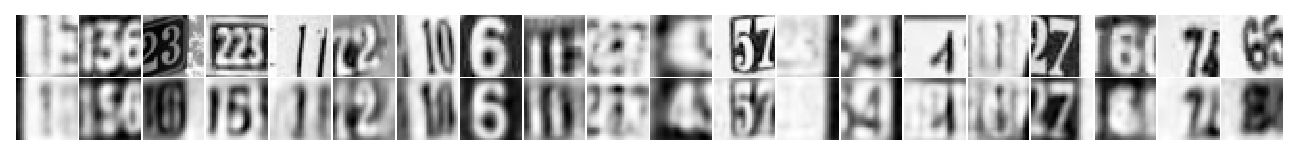

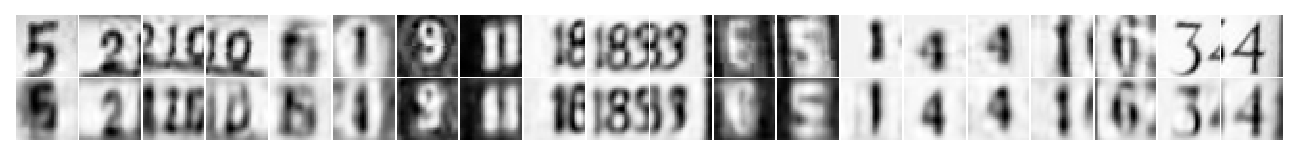

In [33]:
num = 20

x2p_dict = {}
for name, d in results_to_plot.items():
    x2p = np.concatenate([
        d['x'][:num],
        d['y'][:num, -1].reshape(-1, *tr.model.cfg.input_sz),
    ])
    _ = plot_weights(x2p, nrows=2)
    # x2p = (x2p + 1) / 2
    # x2p = np.clip(x2p, 0, 1)
    # x2p_dict[name] = x2p

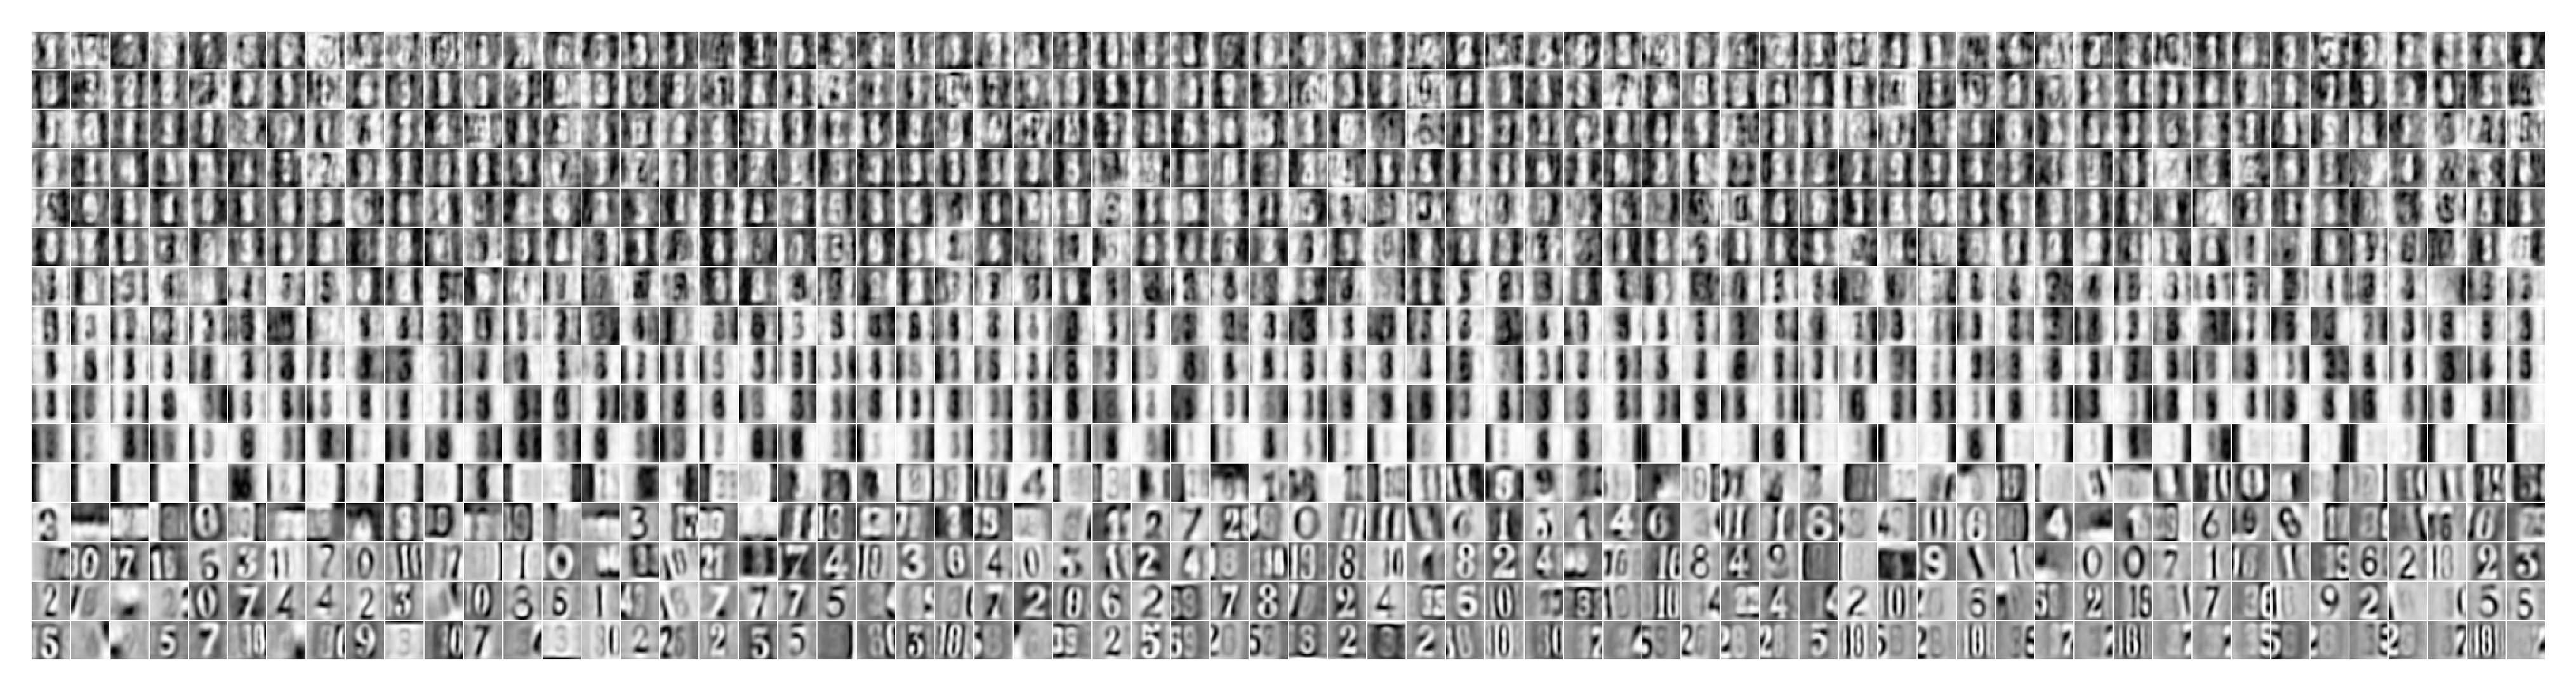

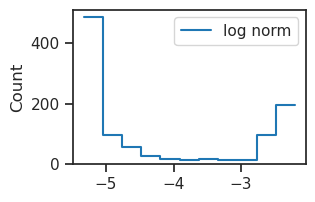

In [29]:
w = tr.model.layer.get_weight()
norms = tonp(torch.linalg.vector_norm(w, dim=1))
log_norm = np.log(norms)

fig, ax = tr.model.show(order=np.argsort(log_norm), dpi=500)

histplot(log_norm, label='log norm')
plt.legend()
plt.show()

In [30]:
sp_stats.pearsonr(log_rate, log_norm)

PearsonRResult(statistic=-0.9897397620451601, pvalue=0.0)

In [ ]:
posterior_log_rates = collections.defaultdict(list)
for x, *_ in iter(tr.dl_vld):
    output = tr.model.xtract_ftr(x)
    for t, pois in output['dist'].items():
        posterior_log_rates[t].append(torch.log(pois.rate))
posterior_log_rates = {
    t: tonp(torch.cat(v)) for t, v
    in posterior_log_rates.items()
}


fig, ax = create_figure(1, 1, (10, 3.5))
pal = get_cubehelix_palette(tr.model.cfg.seq_len, start=2.5)

for i, (t, v) in enumerate(posterior_log_rates.items()):
    sns.histplot(
        v[:, ~dead].ravel(),
        stat='percent',
        element='step',
        fill=False,
        color=pal[i],
        label=f"T = {t}",
        ax=ax,
    )
# ax.legend()
ax.grid()
plt.show()


fig, axes = create_figure(2, 1, (6, 4.2), sharex='col')
for i, (t, v) in enumerate(posterior_log_rates.items()):
    for ax in axes.flat:
        sns.histplot(
            np.exp(v[:, ~dead].ravel()),
            stat='percent',
            element='step',
            fill=False,
            color=pal[i],
            label=f"T = {t}",
            ax=ax,
        )
axes[1].set(yscale='log')
add_grid(axes)
plt.show()

In [ ]:
pal